In [36]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from torchvision.models import alexnet, vgg16, resnet18
from torchviz import make_dot

In [31]:
alex_model = alexnet(pretrained=True)
vgg_model = vgg16(pretrained=True)
resnet_model = resnet18(pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /Users/apple/.torch/models/resnet18-5c106cde.pth
100.0%


In [59]:
class PoseModel(nn.Module):
    __names__ = {ALEXNET, VGG16, RESNET18}

    def __init__(self, model_name='vgg16'):
        super(PoseModel, self).__init__()

        # check if the model name is allowed
        assert model_name in PoseModel.__names__

        # load pretrained model
        if model_name == ALEXNET:
            model = alexnet(pretrained=True).features
            n_layers = 3
        elif model_name == VGG16:
            model = vgg16(pretrained=True).features
            n_layers = 22
        elif model_name == RESNET18:
            model = resnet18(pretrained=True)
            n_layers = 30

        # take the first few layers of the pretrained model as feature extractor
        self.pretrained = nn.Sequential(*list(model.children())[:n_layers])

        # CPM predictor
        self.cpm = nn.Sequential(
            nn.Conv2d(512, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 512, kernel_size=1, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 3, kernel_size=1, padding=1)
        )

    def forward(self, x):
        x = self.pretrained(x)
        x = self.cpm(x)

        return x

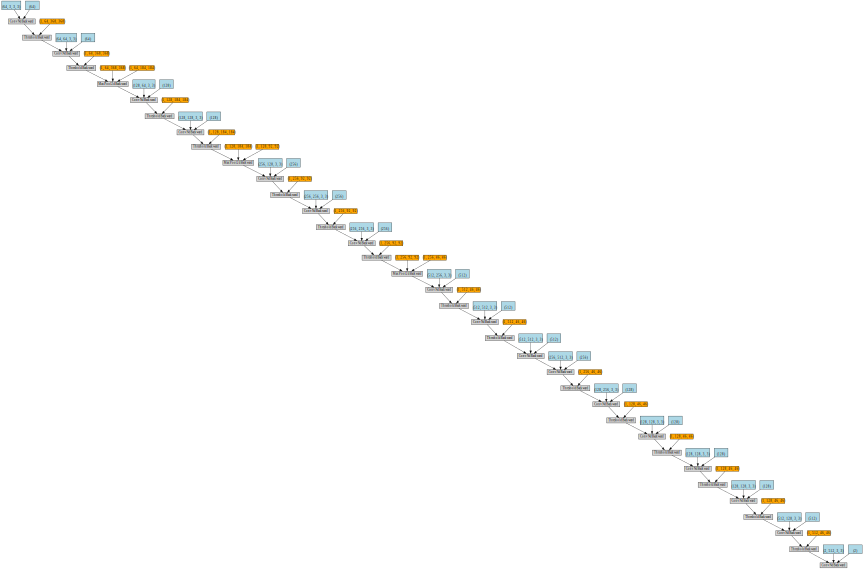

In [60]:
model = PoseModel()
inputs = torch.randn(1, 3, 368, 368)
y = model(Variable(inputs))
make_dot(y)

In [35]:
list(vgg_model.features.children())[:22]

[Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
 ReLU (inplace),
 Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
 ReLU (inplace),
 MaxPool2d (size=(2, 2), stride=(2, 2), dilation=(1, 1)),
 Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
 ReLU (inplace),
 Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
 ReLU (inplace),
 MaxPool2d (size=(2, 2), stride=(2, 2), dilation=(1, 1)),
 Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
 ReLU (inplace),
 Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
 ReLU (inplace),
 Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
 ReLU (inplace),
 MaxPool2d (size=(2, 2), stride=(2, 2), dilation=(1, 1)),
 Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
 ReLU (inplace),
 Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
 ReLU (inplace),
 Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 